# Covid 19 Vaccination Project By Ronak(193156510) and Jordan (171421270)

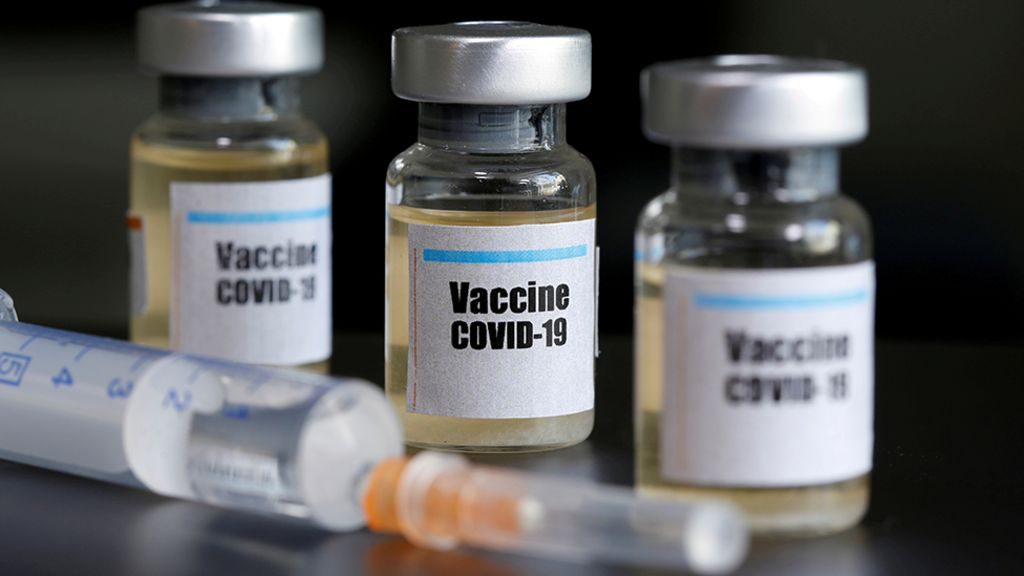

#### Here we both have utilized our learning from the course of CP321 and used to them to perform exploratory data analysis on 2 projects and implemented our insights by combining them and building foresights on the EDA we performed together, Understanding the fact that the canadaian government has started providing covid vaccines we intend to ask the question (What we know know so far)

## Adding in to the Assert Model 
### STEP 1 Ask a question

## Are the Vaccines being adequately provided and administered to each and every province (what we want to know from these datasets) 

### How do we intend to approach this?
### We will administer the cases present in each of the provinces and calculate the number of cases present there we will build time series for both the cases then take the 2 biggest vaccines provider(companies for each ) province we build geo spatial maps to point out the places where most cases were present and most vaccines were recieved by the patients 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani

import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import numpy as np

### STEP 2 Searching for information 
#### This was rather easy we had selected specific datasets that could have

In [2]:
# Read dataframes
canada = gpd.read_file("lpr_000b16a_e.dbf")
canada.columns = ['PRUID', 'PRNAME', 'PRENAME', 'PRFNAME', 'PREABBR', 'PRFABBR', 'geometry']
canada = canada.set_geometry('geometry')

vaccines = pd.read_csv("vaccination-coverage-byVaccineType.csv")

covid = pd.read_csv("covid19.csv")

In [3]:
# Merge dataframes
canada['PRUID']=canada['PRUID'].astype(int)
merged = pd.merge(left=canada, right=vaccines, left_on='PRUID', right_on='pruid')
pd.set_option("display.max_rows", None, "display.max_columns", None)

merged2 = pd.merge(left=canada, right=covid, left_on='PRUID', right_on='pruid')
merged2 = merged.set_index("pruid", drop=False)

merged.head()



,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry,pruid,prename,prfname,week_end,product_name,numtotal_atleast1dose,numtotal_1dose,numtotal_2doses,prop_atleast1dose,prop_1dose,prop_2doses,Unnamed: 11,numweekdelta_atleast1dose,numweekdelta_2doses,propweekdelta_1dose,propweekdelta_2doses
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador,Newfoundland and Labrador,2020-12-19,Pfizer-BioNTech,972,972,0,0.186170162,0.186170162,0,NaN,NaN,NaN,NaN,NaN
1,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador,Newfoundland and Labrador,2020-12-19,Moderna,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador,Newfoundland and Labrador,2020-12-19,Not reported,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador,Newfoundland and Labrador,2020-12-26,Pfizer-BioNTech,1785,1785,0,0.341886563,0.341886563,0,NaN,NaN,NaN,NaN,NaN
4,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador,Newfoundland and Labrador,2020-12-26,Moderna,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


### STEP 3 Structuring the data

In [4]:
# Pfizer data
pfizer = merged[merged['product_name'] == 'Pfizer-BioNTech']

#Pfizer data by province
pfizerNewfoundland = pfizer[pfizer['pruid'] == 10]
pfizerNovaScotia = pfizer[pfizer['pruid'] == 12]
pfizerNewBrunswick = pfizer[pfizer['pruid'] == 13]
pfizerQuebec = pfizer[pfizer['pruid'] == 24]
pfizerOntario = pfizer[pfizer['pruid'] == 35]
pfizerManitoba = pfizer[pfizer['pruid'] == 46]
pfizerSaskatchewan = pfizer[pfizer['pruid'] == 47]
pfizerAlberta = pfizer[pfizer['pruid'] == 48]
pfizerBC = pfizer[pfizer['pruid'] == 59]
pfizerNorthwest = pfizer[pfizer['pruid'] == 61]
pfizerYukon = pfizer[pfizer['pruid'] == 60]
pfizerNunavut = pfizer[pfizer['pruid'] == 62]

# Moderna data
moderna = merged[merged['product_name'] == 'Moderna']

# Moderna data by province
modernaNewfoundland = moderna[moderna['pruid'] == 10]
modernaNovaScotia = moderna[moderna['pruid'] == 12]
modernaNewBrunswick = moderna[moderna['pruid'] == 13]
modernaQuebec = moderna[moderna['pruid'] == 24]
modernaOntario = moderna[moderna['pruid'] == 35]
modernaManitoba = moderna[moderna['pruid'] == 46]
modernaSaskatchewan = moderna[moderna['pruid'] == 47]
modernaAlberta = moderna[moderna['pruid'] == 48]
modernaBC = moderna[moderna['pruid'] == 59]
modernaNorthwest = moderna[moderna['pruid'] == 61]
modernaYukon = moderna[moderna['pruid'] == 60]
modernaNunavut = moderna[moderna['pruid'] == 62]

### STEP 4 Envisioning the answer
#### Here we visualize the entire data set such that we plan to create several time series one containing all the positive cases of Canada and comparing them against the the supply of Covid-19 vaccines so far granted both the process have taken place after a significant gap between each other our main goal is to form a insights based on the sheer number of cases and the vaccines received per province we are only taking in consideration the two major vaccines supplied across the nation this is being Pfizer vaccine and Moderna Vaccine

### STEP 5 Representing the visualization

<ipython-input-5-1c3ac2bd0888>:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pfizerNewfoundland.week_end, rotation=45)


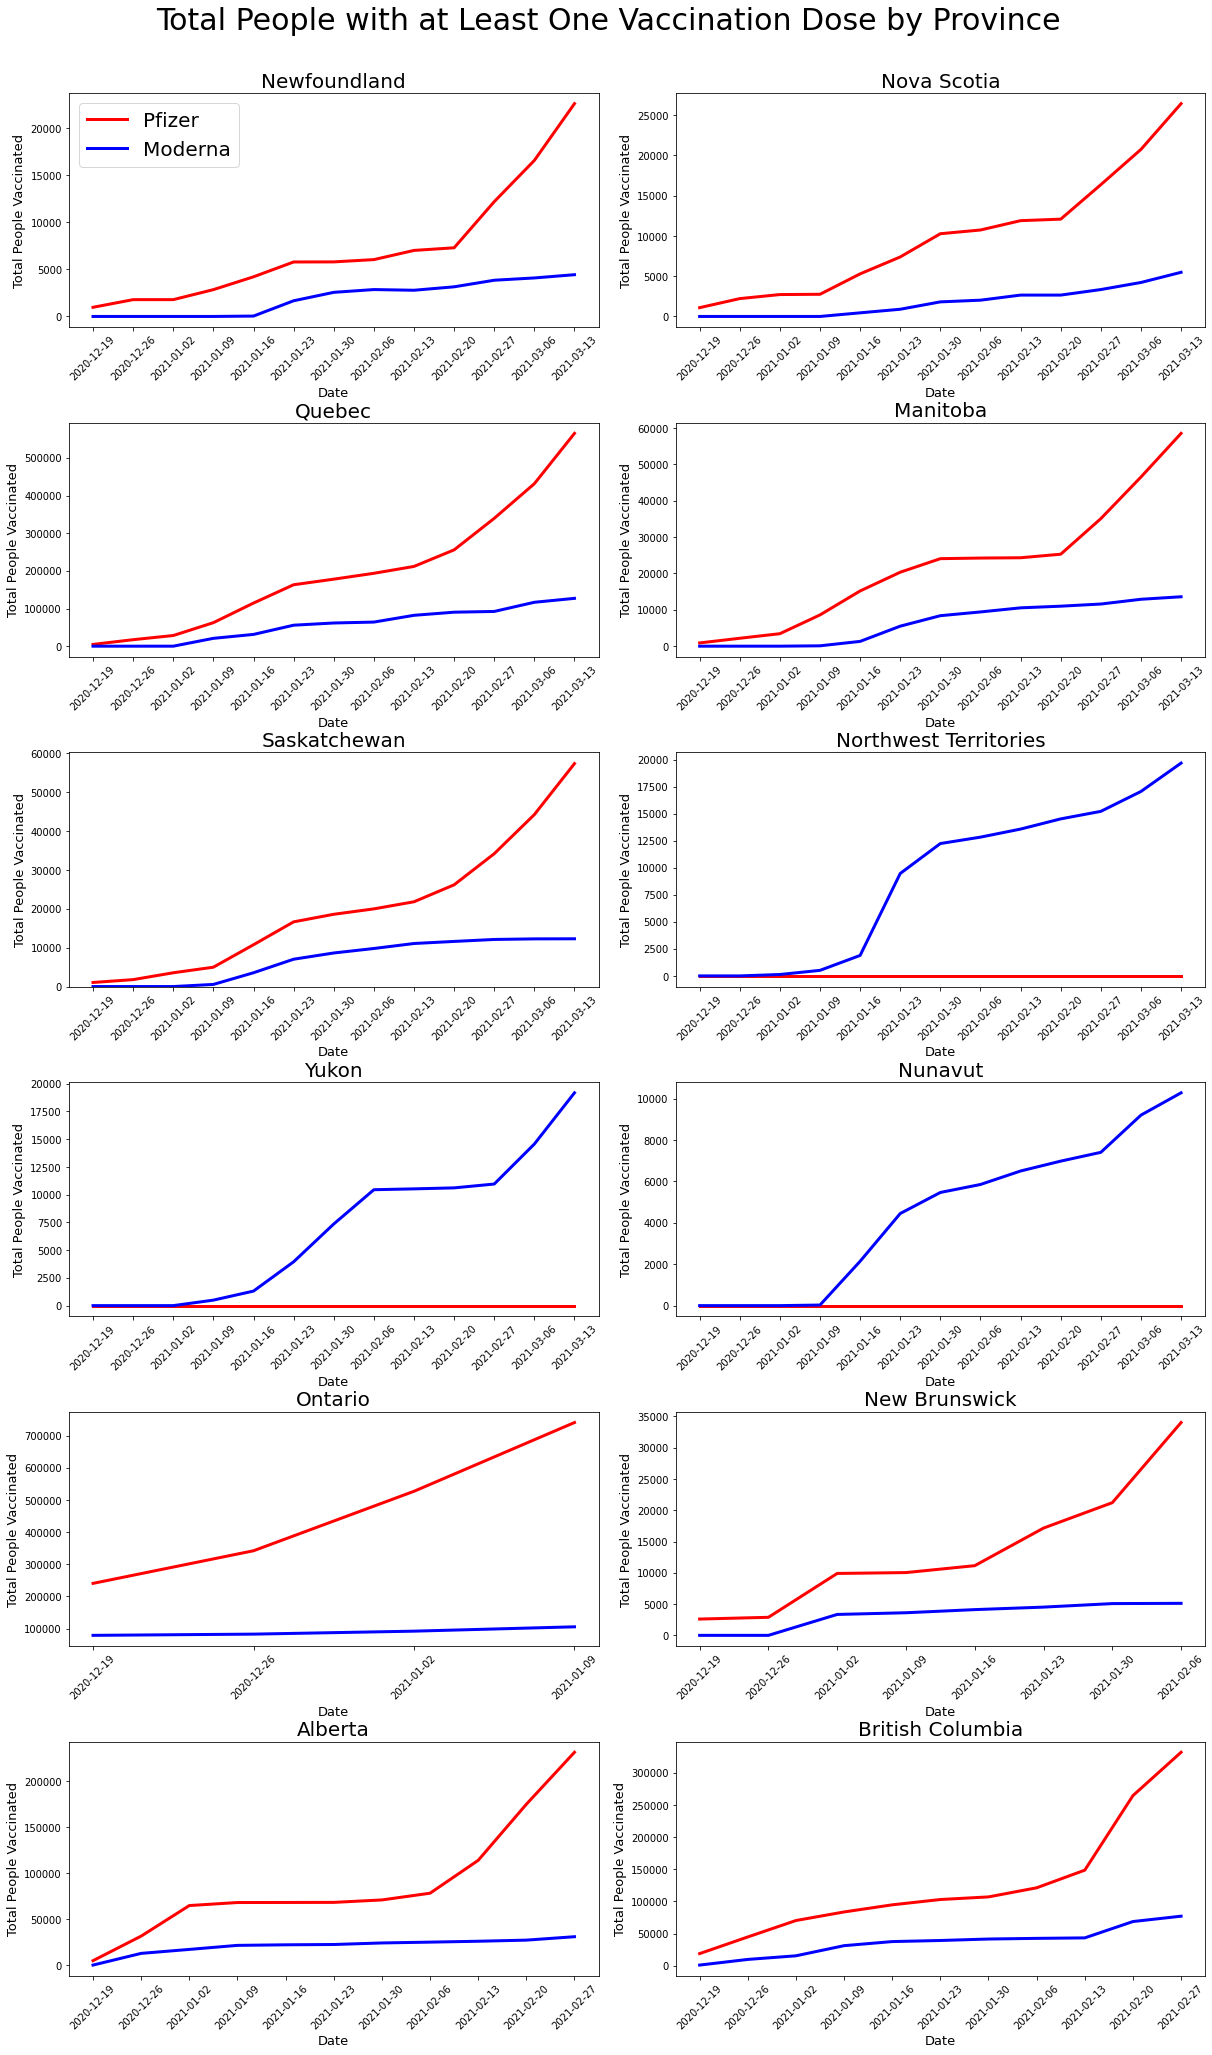

In [5]:
# Plot vaccine time series

fig, axs = plt.subplots(6,2,figsize=(17,30))

intPfiNew = pd.to_numeric(pfizerNewfoundland.numtotal_atleast1dose)
axs[0,0].plot(pfizerNewfoundland.week_end, intPfiNew, linestyle='-', color='red', label='Pfizer',linewidth='3')
intModNew = pd.to_numeric(modernaNewfoundland.numtotal_atleast1dose)
axs[0,0].plot(modernaNewfoundland.week_end, intModNew, linestyle='-', color='blue', label='Moderna',linewidth='3')
axs[0,0].set_title("Newfoundland", fontsize=20)

intPfiNov = pd.to_numeric(pfizerNovaScotia.numtotal_atleast1dose)
axs[0,1].plot(pfizerNovaScotia.week_end, intPfiNov, linestyle='-', color='red',linewidth='3')
intModNov = pd.to_numeric(modernaNovaScotia.numtotal_atleast1dose)
axs[0,1].plot(modernaNovaScotia.week_end, intModNov, linestyle='-', color='blue',linewidth='3')
axs[0,1].set_title("Nova Scotia", fontsize=20)

intPfiQue = pd.to_numeric(pfizerQuebec.numtotal_atleast1dose)
axs[1,0].plot(pfizerQuebec.week_end, intPfiQue, linestyle='-', color='red',linewidth='3')
intModQue = pd.to_numeric(modernaQuebec.numtotal_atleast1dose)
axs[1,0].plot(modernaQuebec.week_end, intModQue, linestyle='-', color='blue',linewidth='3')
axs[1,0].set_title("Quebec", fontsize=20)

intPfiMan = pd.to_numeric(pfizerManitoba.numtotal_atleast1dose)
axs[1,1].plot(pfizerManitoba.week_end, intPfiMan, linestyle='-', color='red',linewidth='3')
intModMan = pd.to_numeric(modernaManitoba.numtotal_atleast1dose)
axs[1,1].plot(modernaManitoba.week_end, intModMan, linestyle='-', color='blue',linewidth='3')
axs[1,1].set_title("Manitoba", fontsize=20)

intPfiSas = pd.to_numeric(pfizerSaskatchewan.numtotal_atleast1dose)
axs[2,0].plot(pfizerSaskatchewan.week_end, intPfiSas, linestyle='-', color='red',linewidth='3')
intModSas = pd.to_numeric(modernaSaskatchewan.numtotal_atleast1dose)
axs[2,0].plot(modernaSaskatchewan.week_end, intModSas, linestyle='-', color='blue',linewidth='3')
axs[2,0].set_title("Saskatchewan", fontsize=20)

intPfiNor = pd.to_numeric(pfizerNorthwest.numtotal_atleast1dose)
axs[2,1].plot(pfizerNorthwest.week_end, intPfiNor, linestyle='-', color='red',linewidth='3')
intModNor = pd.to_numeric(modernaNorthwest.numtotal_atleast1dose)
axs[2,1].plot(modernaNorthwest.week_end, intModNor, linestyle='-', color='blue',linewidth='3')
axs[2,1].set_title("Northwest Territories", fontsize=20)

intPfiYuk = pd.to_numeric(pfizerYukon.numtotal_atleast1dose)
axs[3,0].plot(pfizerNorthwest.week_end, intPfiYuk, linestyle='-', color='red',linewidth='3')
intModYuk = pd.to_numeric(modernaYukon.numtotal_atleast1dose)
axs[3,0].plot(modernaYukon.week_end, intModYuk, linestyle='-', color='blue',linewidth='3')
axs[3,0].set_title("Yukon", fontsize=20)

intPfiNun = pd.to_numeric(pfizerNunavut.numtotal_atleast1dose)
axs[3,1].plot(pfizerNunavut.week_end, intPfiNun, linestyle='-', color='red',linewidth='3')
intModNun = pd.to_numeric(modernaNunavut.numtotal_atleast1dose)
axs[3,1].plot(modernaNunavut.week_end, intModNun, linestyle='-', color='blue',linewidth='3')
axs[3,1].set_title("Nunavut", fontsize=20)

intPfiOnt = pd.to_numeric(pfizerOntario.numtotal_atleast1dose)
axs[4,0].plot(pfizerOntario.week_end, intPfiOnt, linestyle='-', color='red',linewidth='3')
intModOnt = pd.to_numeric(modernaOntario.numtotal_atleast1dose)
axs[4,0].plot(modernaOntario.week_end, intModOnt, linestyle='-', color='blue',linewidth='3')
axs[4,0].set_title("Ontario", fontsize=20)

intPfiNB = pd.to_numeric(pfizerNewBrunswick.numtotal_atleast1dose)
axs[4,1].plot(pfizerNewBrunswick.week_end, intPfiNB, linestyle='-', color='red',linewidth='3')
intModNB = pd.to_numeric(modernaNewBrunswick.numtotal_atleast1dose)
axs[4,1].plot(pfizerNewBrunswick.week_end, intModNB, linestyle='-', color='blue',linewidth='3')
axs[4,1].set_title("New Brunswick", fontsize=20)

intPfiAlb = pd.to_numeric(pfizerAlberta.numtotal_atleast1dose)
axs[5,0].plot(pfizerAlberta.week_end, intPfiAlb, linestyle='-', color='red',linewidth='3')
intModAlb = pd.to_numeric(modernaAlberta.numtotal_atleast1dose)
axs[5,0].plot(pfizerAlberta.week_end, intModAlb, linestyle='-', color='blue',linewidth='3')
axs[5,0].set_title("Alberta", fontsize=20)

intPfiBC = pd.to_numeric(pfizerBC.numtotal_atleast1dose)
axs[5,1].plot(pfizerBC.week_end, intPfiBC, linestyle='-', color='red',linewidth='3')
intModBC = pd.to_numeric(modernaBC.numtotal_atleast1dose)
axs[5,1].plot(pfizerBC.week_end, intModBC, linestyle='-', color='blue',linewidth='3')
axs[5,1].set_title("British Columbia", fontsize=20)

# Graph formatting
for ax in axs.flat:
    ax.set_xticklabels(pfizerNewfoundland.week_end, rotation=45)
    ax.set_xlabel("Date", fontsize=13)
    ax.set_ylabel("Total People Vaccinated", fontsize=13)


axs[2,0].set_ylim(bottom=0)
fig.tight_layout()

st = plt.suptitle("Total People with at Least One Vaccination Dose by Province", fontsize=30)
axs[0,0].legend(fontsize=20)

st.set_y(0.95)
fig.subplots_adjust(top=0.91)

plt.show()

In [6]:
# COVID data by province


covidNewfoundland = covid[covid['pruid'] == 10]
covidNovaScotia = covid[covid['pruid'] == 12]
covidNewBrunswick = covid[covid['pruid'] == 13]
covidQuebec = covid[covid['pruid'] == 24]
covidOntario = covid[covid['pruid'] == 35]
covidManitoba = covid[covid['pruid'] == 46]
covidSaskatchewan = covid[covid['pruid'] == 47]
covidAlberta = covid[covid['pruid'] == 48]
covidBC = covid[covid['pruid'] == 59]
covidNorthwest = covid[covid['pruid'] == 61]
covidYukon = covid[covid['pruid'] == 60]
covidNunavut = covid[covid['pruid'] == 62]

In [7]:
covid.head(20)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numteststoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,31-01-2020,NaN,3,0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,3,300.00,0.02,0.0,0.0,0.0,NaN,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,31-01-2020,NaN,1,0,0.0,1,NaN,0,NaN,NaN,NaN,NaN,1,100.00,0.02,0.0,0.0,0.0,NaN,NaN,NaN,100.0,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,31-01-2020,NaN,4,0,0.0,4,NaN,0,NaN,NaN,NaN,NaN,4,400.00,0.01,0.0,0.0,0.0,NaN,NaN,NaN,100.0,4.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,08-02-2020,NaN,3,0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,0,0.00,0.02,0.0,0.0,0.0,NaN,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,08-02-2020,NaN,4,0,0.0,4,NaN,63,NaN,NaN,NaN,12.0,3,300.00,0.08,0.0,0.0,0.0,NaN,NaN,NaN,100.0,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,Canada,Canada,08-02-2020,NaN,7,0,0.0,7,NaN,63,NaN,NaN,NaN,2.0,3,75.00,0.02,0.0,0.0,0.0,NaN,NaN,NaN,100.0,7.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35,Ontario,Ontario,16-02-2020,NaN,3,0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,0,0.00,0.02,0.0,0.0,0.0,NaN,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,59,British Columbia,Colombie-Britannique,16-02-2020,NaN,5,0,0.0,5,NaN,109,NaN,NaN,NaN,21.0,1,25.00,0.10,0.0,0.0,0.0,NaN,NaN,NaN,100.0,5.0,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,Canada,Canada,16-02-2020,NaN,8,0,0.0,8,NaN,109,NaN,NaN,NaN,3.0,1,14.29,0.02,0.0,0.0,0.0,NaN,NaN,NaN,100.0,8.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,35,Ontario,Ontario,21-02-2020,NaN,3,0,0.0,3,NaN,0,NaN,NaN,NaN,NaN,0,0.00,0.02,0.0,0.0,0.0,NaN,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-8-ffd2829a9885>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(covidNewfoundland.date, rotation=45)
<ipython-input-8-ffd2829a9885>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(covidNovaScotia.date, rotation=45)
<ipython-input-8-ffd2829a9885>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(covidNewBrunswick.date, rotation=45)
<ipython-input-8-ffd2829a9885>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(covidQuebec.date, rotation=45)
<ipython-input-8-ffd2829a9885>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2,0].set_xticklabels(covidOntario.date, rotation=45)
<ipython-input-8-ffd2829a9885>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2,1].set_xticklabels(covidMa

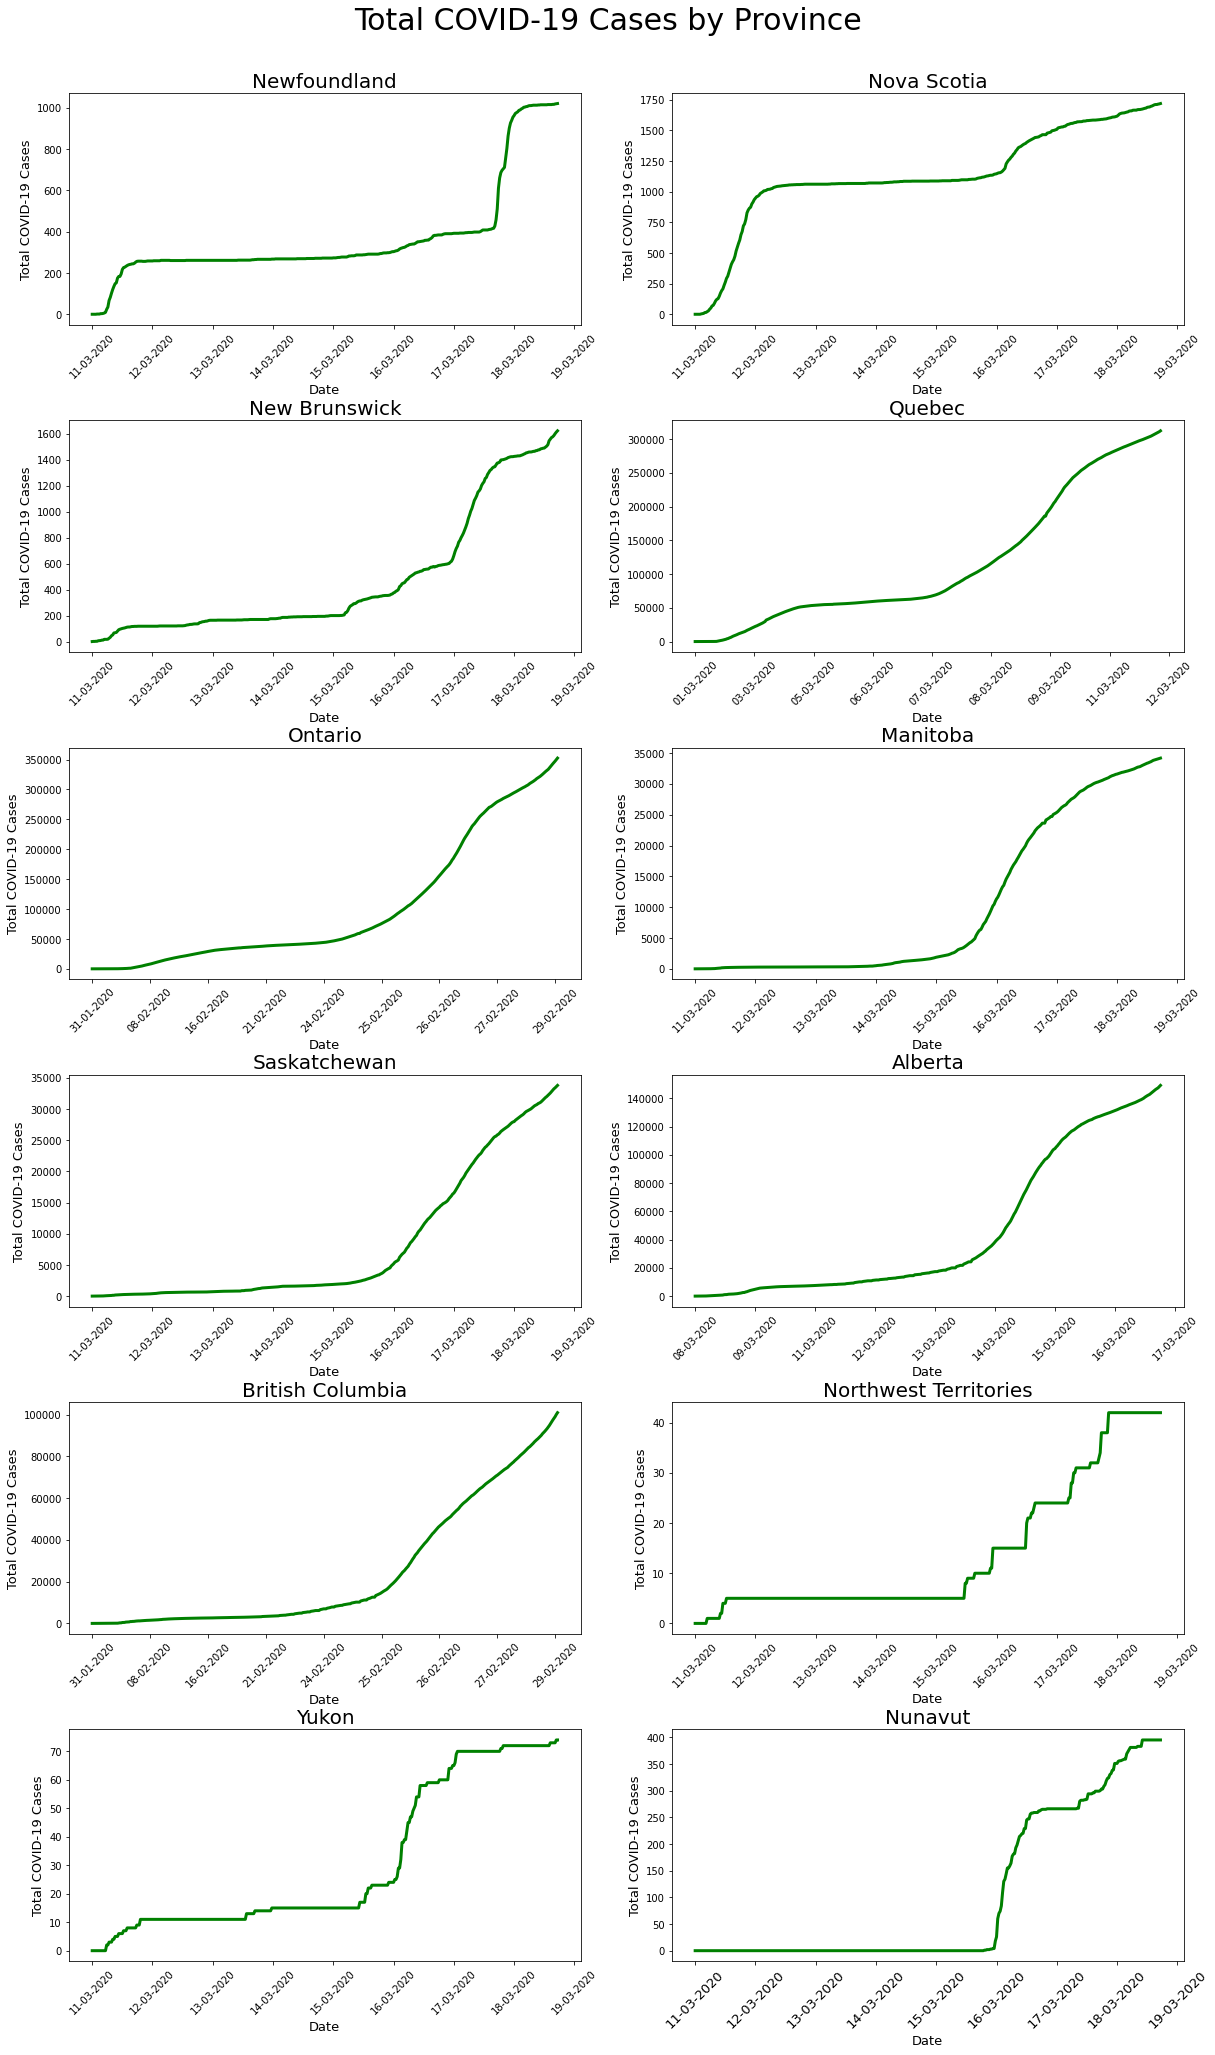

In [8]:
fig, axs = plt.subplots(6,2,figsize=(17,30))

intCOVNew = pd.to_numeric(covidNewfoundland.numtotal)
axs[0,0].plot(covidNewfoundland.date, intCOVNew, linestyle='-', color='green',linewidth='3')
axs[0,0].set_title("Newfoundland", fontsize=20)
axs[0,0].set_xticklabels(covidNewfoundland.date, rotation=45)

intCOVNov = pd.to_numeric(covidNovaScotia.numtotal)
axs[0,1].plot(covidNovaScotia.date, intCOVNov, linestyle='-', color='green',linewidth='3')
axs[0,1].set_title("Nova Scotia", fontsize=20)
axs[0,1].set_xticklabels(covidNovaScotia.date, rotation=45)

intCOVNB = pd.to_numeric(covidNewBrunswick.numtotal)
axs[1,0].plot(covidNewBrunswick.date, intCOVNB, linestyle='-', color='green',linewidth='3')
axs[1,0].set_title("New Brunswick", fontsize=20)
axs[1,0].set_xticklabels(covidNewBrunswick.date, rotation=45)

intCOVQue = pd.to_numeric(covidQuebec.numtotal)
axs[1,1].plot(covidQuebec.date, intCOVQue, linestyle='-', color='green',linewidth='3')
axs[1,1].set_title("Quebec", fontsize=20)
axs[1,1].set_xticklabels(covidQuebec.date, rotation=45)

intCOVOnt = pd.to_numeric(covidOntario.numtotal)
axs[2,0].plot(covidOntario.date, intCOVOnt, linestyle='-', color='green',linewidth='3')
axs[2,0].set_title("Ontario", fontsize=20)
axs[2,0].set_xticklabels(covidOntario.date, rotation=45)

intCOVMan = pd.to_numeric(covidManitoba.numtotal)
axs[2,1].plot(covidManitoba.date, intCOVMan, linestyle='-', color='green',linewidth='3')
axs[2,1].set_title("Manitoba", fontsize=20)
axs[2,1].set_xticklabels(covidManitoba.date, rotation=45)

intCOVSas = pd.to_numeric(covidSaskatchewan.numtotal)
axs[3,0].plot(covidSaskatchewan.date, intCOVSas, linestyle='-', color='green',linewidth='3')
axs[3,0].set_title("Saskatchewan", fontsize=20)
axs[3,0].set_xticklabels(covidSaskatchewan.date, rotation=45)

intCOVAlb = pd.to_numeric(covidAlberta.numtotal)
axs[3,1].plot(covidAlberta.date, intCOVAlb, linestyle='-', color='green',linewidth='3')
axs[3,1].set_title("Alberta", fontsize=20)
axs[3,1].set_xticklabels(covidAlberta.date, rotation=45)

intCOVBC = pd.to_numeric(covidBC.numtotal)
axs[4,0].plot(covidBC.date, intCOVBC, linestyle='-', color='green',linewidth='3')
axs[4,0].set_title("British Columbia", fontsize=20)
axs[4,0].set_xticklabels(covidBC.date, rotation=45)

intCOVNor = pd.to_numeric(covidNorthwest.numtotal)
axs[4,1].plot(covidNorthwest.date, intCOVNor, linestyle='-', color='green',linewidth='3')
axs[4,1].set_title("Northwest Territories", fontsize=20)
axs[4,1].set_xticklabels(covidNorthwest.date, rotation=45)

intCOVYuk = pd.to_numeric(covidYukon.numtotal)
axs[5,0].plot(covidYukon.date, intCOVYuk, linestyle='-', color='green',linewidth='3')
axs[5,0].set_title("Yukon", fontsize=20)
axs[5,0].set_xticklabels(covidYukon.date, rotation=45)

intCOVNun = pd.to_numeric(covidNunavut.numtotal)
axs[5,1].plot(covidNunavut.date, intCOVNun, linestyle='-', color='green',linewidth='3')
axs[5,1].set_title("Nunavut", fontsize=20)
axs[5,1].set_xticklabels(covidNunavut.date, rotation=45)

# Graph formatting

for ax in axs.flat:
    ax.set_xticks([0,50,100,150,200,250,300,350,400])
    plt.xticks(fontsize=13)
    
    ax.set_xlabel("Date", fontsize=13)
    ax.set_ylabel("Total COVID-19 Cases", fontsize=13)

fig.tight_layout()

st = plt.suptitle("Total COVID-19 Cases by Province", fontsize=30)

st.set_y(0.95)
fig.subplots_adjust(top=0.91)

plt.show()

In [9]:
pop = pd.read_csv("population.csv")

In [10]:
pop1 = pd.DataFrame({'Provinces':['Alberta', 'BritishColumbia', 'Manitoba',
       'NewBrunswick', 'NewfoundlandAndLabrador', 'NovaScotia', 'Ontario',
       'PrinceEdwardIsland', 'Quebec', 'Saskatchewan'], 'population':[417540, 4666892, 1292151, 753319, 525756, 942926, 13750073, 146293, 8245470, 1134402
]})

In [11]:
pop1.sort_values('population',inplace=True)

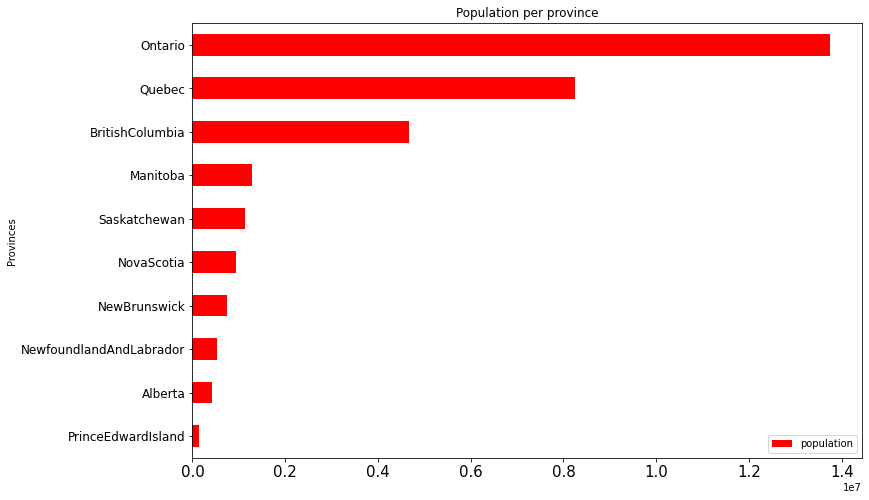

In [12]:
ax=pop1.plot.barh(x='Provinces',y='population',figsize=(12,8),color='r',title = 'Population per province')

ax.tick_params(axis='x', which='both', labelsize=15)
ax.tick_params(axis='y', which='both', labelsize=12)

In [13]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pruid                      527 non-null    int64  
 1   prename                    527 non-null    object 
 2   prfname                    527 non-null    object 
 3   week_end                   527 non-null    object 
 4   product_name               527 non-null    object 
 5   numtotal_atleast1dose      527 non-null    int64  
 6   numtotal_1dose             527 non-null    object 
 7   numtotal_2doses            486 non-null    object 
 8   prop_atleast1dose          527 non-null    object 
 9   prop_1dose                 527 non-null    object 
 10  prop_2doses                486 non-null    object 
 11  Unnamed: 11                0 non-null      float64
 12  numweekdelta_atleast1dose  0 non-null      float64
 13  numweekdelta_2doses        0 non-null      float64

In [14]:
vaccines.describe()

,pruid,numtotal_atleast1dose,Unnamed: 11,numweekdelta_atleast1dose,numweekdelta_2doses,propweekdelta_1dose,propweekdelta_2doses
count,527.000000,5.270000e+02,0.0,0.0,0.0,0.0,0.0
mean,34.396584,4.321955e+04,NaN,NaN,NaN,NaN,NaN
std,22.341887,1.514323e+05,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,12.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,46.000000,1.038000e+03,NaN,NaN,NaN,NaN,NaN
75%,59.000000,1.527650e+04,NaN,NaN,NaN,NaN,NaN
max,62.000000,2.076950e+06,NaN,NaN,NaN,NaN,NaN


In [15]:
canada.head()

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."


Text(0.5, 1.0, 'Pfizer Vaccinations by Province (Mar 13th, 2021)')

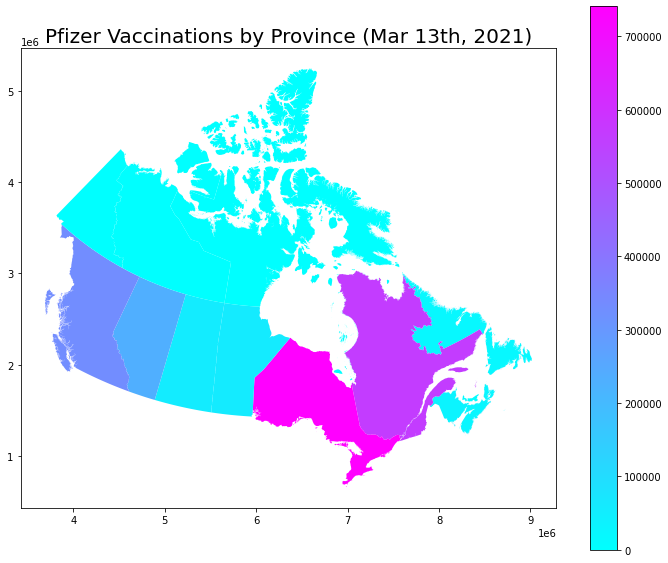

In [16]:
# Specify lastest date and Pfizer vaccine
merged = merged[merged['week_end'] == '2021-03-13']
merged = merged[merged['product_name'] == 'Pfizer-BioNTech']

# Display map
merged = GeoDataFrame(merged)
merged.plot(column='numtotal_atleast1dose', figsize=(12,10), legend=True, cmap='cool')
plt.title("Pfizer Vaccinations by Province (Mar 13th, 2021)",size=20)

Text(0.5, 1.0, 'Moderna Vaccinations by Province (Mar. 13th, 2021)')

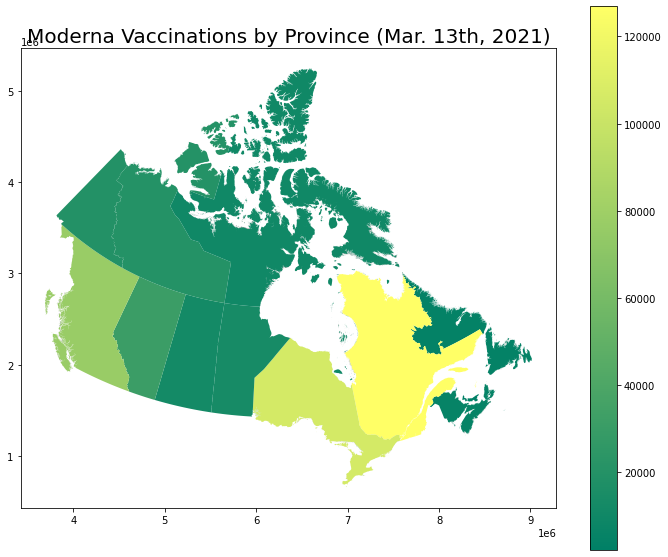

In [17]:
# Specify lastest date and Moderna vaccine
merged = pd.merge(left=canada, right=vaccines, left_on='PRUID', right_on='pruid')
merged = merged.set_index("pruid", drop=False)

# Display map
merged = merged[merged['week_end'] == '2021-03-13']
merged = merged[merged['product_name'] == 'Moderna']
merged = GeoDataFrame(merged)
merged.plot(column='numtotal_atleast1dose', figsize=(12,10), legend=True, cmap='summer')
plt.title("Moderna Vaccinations by Province (Mar. 13th, 2021)",size=20)

Text(0.5, 1.0, 'COVID-19 Cases by Province (Apr. 1st, 2021)')

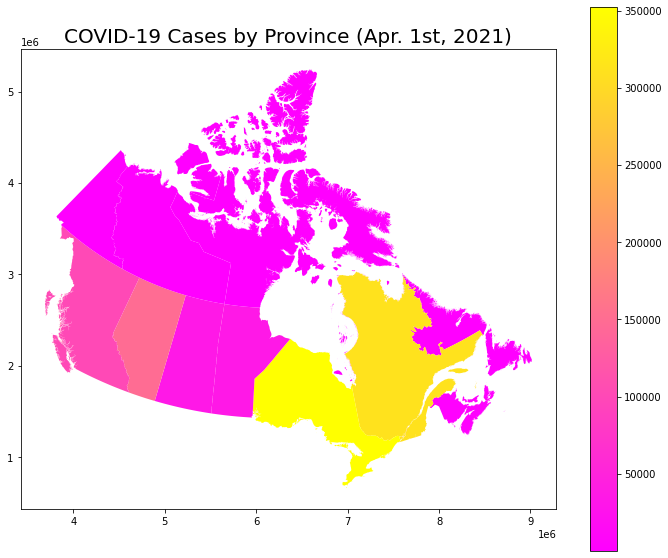

In [18]:
# Specify lastest date
merged2 = pd.merge(left=canada, right=covid, left_on='PRUID', right_on='pruid')
merged2 = merged2.set_index("pruid", drop=False)

# Display map
merged2 = merged2[merged2['date'] == '01-04-2021']
merged2 = GeoDataFrame(merged2)
merged2.plot(column='numtotal', figsize=(12,10), legend=True, cmap='spring')
plt.title("COVID-19 Cases by Province (Apr. 1st, 2021)",size=20)

## STEP 6 Telling a story -- what we learnt
### WE Tell a story and as you can clearly see the fact that the government is trying to provide the vaccines however it's not taking into the consideration that it should try provide larger and more quantitative resources to places with high number of cases like Alberta, BC, Ontario and Quebec. Not only that but also the face that BC, Alberta and Ontario have a much higher general population and are Covid hot spots due to overwhelming presence of international travelers. Our first step in vaccination should be prioritize on larger groups of healthy people residing in these area who are prone to catching the disease, Meanwhile people in locations can be vaccinated later or might be even able to eradicate the disease in their province by following optimal social distancing practices and our first priority should be regions where it's extremely easy to catch the disease.